<font size="6">Word embeddings for exploratory data analysis </font>

In [1]:
%matplotlib notebook

In [2]:
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.patches as mpatches

Traditionally, natural language processing has commonly used the bag-of-words model to transform text data into vector form. This means that we represent each piece of text as a high-dimensional vector and each component of the vector is associated to a particular word. When we transform a document into its vector form, the ith component of the vector contains the count of occurrences of the ith word in our vocabulary.<br><br>
Let's have a quick example. Suppose our vocabulary consists of the words: dog, the, cat, big, ran, by



Now we have the sentence:<br> The big dog ran.

Let's say our vectors are of the form  $(dog, the, cat, big, ran, by)$,  where we are indicating which component corresponds to which word.<br>
Then our sentence transforms as $(1, 1, 0, 1, 1, 0)$<br><br> Note that the words <i>cat</i> and <i>by</i> each have zeros in their corresponding components because they both fail to appear in the sentence while every other word in our vocabulary occurs once and therefore has a $1$ in its corresponding component.

Now consider the sentence:<br> The cat ran by the dog.

This transforms to $(1, 2, 1, 0, 1, 1)$. <br><br>Note that the word <i>the</i> has a $2$ in its corresponding component because it appears twice, while the word <i>big</i> has a zero as it doesn't occur at all, and all other words have a $1$ in their
components because they each appear once.

In this way, the data is put into a form that can be used as input for statistical models and algorithms. 
This method has proven effective for many supervised learning problems. However, in the transition from the document to its representation as a vector of word counts, much information is also lost. For example, it's clear that once we transform a document into a vector of counts, there is no way for us to recover the order the words appeared in.<br><br>
But the problems go deeper still. In information retrieval, a common and simple way to quantify the similarity of two vectors is to use the cosine similarity. Recall that the dot product of two vectors $v$ and $w$ in $\mathbb{R}^{D}$  may be computed as <br>$\langle v, w\rangle = \|w\|\times\|v\|\times cos(\theta)$, where $\theta$ is the angle between $v$ and $w$ and $\|\cdot\|$ is the Euclidean norm or length. Assuming our inputs are nonzero vectors, we may divide both sides of the equation by the product of the norms to get back $cos(\theta)$.




Recalling that $ -1 \leq cos(\theta) \leq 1$ for all $\theta \in \mathbb{R}$, the resulting number may be interpreted in terms of simple geometry.
A value of 1 indicates that $w$ and $v$ determine exactly the same direction in the vector space they live in.
This is the greatest level of similarity we could obtain. On the other hand, a value of -1 indicates two vectors that 
point in opposite directions. They have a sort of negative similarity. Meanwhile, a value of $0$ indicates that the vectors are orthogonal, ie perpendicular, ie they form $90^{\circ}$ angles to each other. In this case, we conclude the vectors have no sort of similarity. They define independent directions in the vector space.
<br>So a value of zero indicates no similarity, a positive value indicates a positive similarity, and a negative value indicates a  sort of negative similarity.

Now what does all this math have to do with the simple vectors of counts that we are using for representing documents?
Well, consider the vector representation of the word <i>dog</i>. Continuing with the small vocabulary used in our examples, it may be represented as $(1, 0, 0, 0, 0, 0)$. <br>Now take the word <i>cat</i>. Its representation as a vector is $(0, 0, 1, 0, 0, 0)$. Recalling that we may also compute $\langle v,w \rangle$ as
$\sum_{i=0}^{i=5} v_{i}\cdot w_{i}$, it's apparent that the vectors for the words <i>cat</i> and <i>dog</i> will have a dot product equal to $0$ and hence a cosine similarity equal to $0$.  In fact, under the bag-of-words model, any two
vectors representing individual words will have a cosine similarity equal to $0$. 


So we run into a problem. The bag-of-words model gives us a vector representation for each word that is useless on its own. The vector for the word <i>dog</i> is no more similar to the vector for the word $cat$ than to the vector for the word $big$. Thus, while we may still build effective supervised learning models around the bag-of-words representation, it leaves much to be desired, particularly for exploring data.

This leads us to word embeddings. To explain word embeddings is beyond the scope of this project, but hopefully the need for an alternative to the bag-of-words model has been shown to some extent. Suffice it to say that word embeddings provide an alternative way to represent words as vectors where rather than having a single word being concentrated into one component of a high-dimensional vector, its
meaning is distributed across many different components of a vector of lower dimensionality.

When we train word embeddings, the cosine similarity of vectors corresponding to different words will actually carry meaning, and we can use it and some other ideas to extract interesting information and trends from text data.

Using the excellent software package gensim, I trained a word embedding model on a dataset of 200,000 Amazon reviews of food products using a particular word embedding algorithm called Skip-gram. Once the input has been appropriately cleaned, this can be done in a couple of lines of code. I saved the word vectors and will now import them.

In [3]:
word_vectors = KeyedVectors.load('skipgramvec.bin')

We can easily begin to perform queries on the data now. There are a number of different types of queries we can perform. A simple and interesting one is to request the words most similar by cosine similarity to a given word in the vocabulary. Let's look at what words are most similar to the word <i>fruit</i>.

In [4]:
word_vectors.most_similar('fruit')

[('strawberries', 0.7308273911476135),
 ('fruits', 0.7157571911811829),
 ('apple', 0.684956431388855),
 ('leathers', 0.683266282081604),
 ('strawberry', 0.6718308925628662),
 ('grape', 0.6683783531188965),
 ('mango', 0.6636447906494141),
 ('berry', 0.6621095538139343),
 ('pineapple', 0.6555788516998291),
 ('banana', 0.6531453728675842)]

When we queried the words most similar to <i>fruit</i>, we got different types of fruits. This is a good sign, it means our word embedding algorithm did a good job of learning informative representations--at least for fruit words.
We asked about a general sort of object <i>fruit</i>, and the vectors most similar to the fruit vector are vectors representing the words for specific types of fruit, ie strawberries, apple, mango, etc.

Now let's query a specific type of fruit. Let's say we want words most similar to <i>pineapple</i>.

In [5]:
word_vectors.most_similar('pineapple')

[('mango', 0.8059549331665039),
 ('pomegranate', 0.7506917715072632),
 ('guava', 0.7467077970504761),
 ('grapefruit', 0.7274436354637146),
 ('peach', 0.7044666409492493),
 ('tropical', 0.7038076519966125),
 ('passionfruit', 0.7008510828018188),
 ('passion', 0.6985024809837341),
 ('grape', 0.6970702409744263),
 ('tangerine', 0.6908766031265259)]

Again, we see that our word embeddings did a good job at capturing meaning. Not only are fruit words most similar to the word <i>pineapple</i>, but we see that some of the fruit words most similar to <i>pineapple</i> are for other tropical or exotic fruits, such as guava, mango, passionfruit, and pomegranate. <br>So the similarity is capturing not just that they are objects from the same general class <i>fruit</i>, but that they even have some qualities in common, like being tropical fruit and perhaps a little outside of the basic realm of the most commonly purchased fruits like bananas and apples.<br><br>
Let's look for comparison at the similarity of pineapple and apple.

In [6]:
word_vectors.similarity('pineapple', 'apple')


0.66857081748598424

Both being fruits, they have a high degree of similarity, but it still lags a good amount behind the similarity of say, <i>pineapple</i> and <i>mango</i>, which are both tropical fruits and are often combined together in juices and other products.

Let's now take a moment to check how our word embeddings do in quantifying the similarity of two unrelated words.
Let's check the similarity of the words <i>dog</i> and <i>wine</i>.

In [7]:
word_vectors.similarity('dog', 'wine')


0.072750591782012805

We see that in this case, the cosine similarity is quite close to zero. This is excellent. It would be rather mystifying if the words <i>dog</i> and <i>wine</i> were learned to be similar to each other.

So we've seen a little of the kind of information we can get by making queries about nouns. Now let's try an adjective. We will use the word <i>wholesome</i>.

In [8]:
word_vectors.most_similar('wholesome')

[('healthy', 0.6417551040649414),
 ('nutritious', 0.6399879455566406),
 ('pronounceable', 0.6311414241790771),
 ('awesomely', 0.6084539890289307),
 ('natural', 0.6060644388198853),
 ('unprocessed', 0.5941694378852844),
 ('heathy', 0.5926592350006104),
 ('sensible', 0.5909892320632935),
 ('organic', 0.5638256072998047),
 ('catfoods', 0.5586196184158325)]

We see that for the adjective <i>wholesome</i>, most of the similar words are other adjectives that can be used to convey that a certain food product has health benefits. For example, we see words such as <i>organic</i> and <i>unprocessed</i>.  This query is perhaps even more helpful or informative than a query about a noun. For example, in attempting to get the message across to consumers that a certain food product has health benefits, we can use some of the words seen above together and hopefully using them together will better convey the message than if we had just used the word <i>wholesome</i>.

We can continue to query individual words but even more is possible. One of the nice things about vectors is that they can be added together, and their addition satisfies the same rules as the addition of numbers. In particular, each vector $v$ has an additive inverse $-v$ that satisfies $v + (-v) = 0$, and $-v$ is obtained simply by taking the negative of each component of v. Now how can we use the simple laws of vector addition to get more information from our word embeddings?

First, we can just take two word vectors, say $v$ and $w$, and add them together, say $v+w = t$. The sum of two vectors is simply another vector, so we have a new vector $t$. Now the vector $t$ does not correspond to any particular word in the vocabulary, but it can be thought of as combining the qualities of the words represented by $v$ and  by $w$. Since $t$ is another vector, we can still query its similarity to the word vectors in we produced from the data.<br><br>
Let's see how this works in practice.

So let's see what happens when we query the word vectors most similar to the sum of the vectors for the words $nut$ and $healthy$. This corresponds to looking for the word vectors most similar to $v_{nut} + v_{healthy}$. First, we'll just query the words most similar to <i>nut</i>, and then see what kind of changes we observe when add in the word <i>healthy</i>.

In [9]:
word_vectors.most_similar('nut')

[('granola', 0.6985430121421814),
 ("kashi's", 0.6799800992012024),
 ('planters', 0.6775401830673218),
 ('hazel', 0.6677975058555603),
 ("justin's", 0.6640942096710205),
 ('cashew', 0.6575517058372498),
 ('nuts', 0.6522628664970398),
 ('cheerios', 0.647641658782959),
 ("valley's", 0.64533931016922),
 ('peanuts', 0.640933632850647)]

In [10]:
word_vectors.most_similar(positive=['nut', 'healthy'])

[('nutritious', 0.7143200635910034),
 ('granola', 0.701509952545166),
 ('probar', 0.6892828941345215),
 ('envirokidz', 0.6857480406761169),
 ('hazel', 0.6747849583625793),
 ("kashi's", 0.6688933372497559),
 ('crunchy', 0.6683398485183716),
 ('sunbutter', 0.6631151437759399),
 ("valley's", 0.6627517938613892),
 ("planter's", 0.657977819442749)]

In the first query, we see some words related to types of nuts, like  <i>peanuts</i> and <i>cashew</i>. But we also see some brands that produce nuts or nut-based products, like Planters and Kashi.

In the second query, we see more brands of nuts and nut-based products that did not appear in the previous query. For example, the brands EnviroKidz and ProBar appear near the top of the list. We can conclude that these brands, whether by their actual qualities or by clever advertising, have done a good job of having themselves be considered as healthy foods by consumers.

Now, just as we can add word vectors to get a vector that is representative of both words, we can add the additive inverse of a word vector to negate its qualities. For example, if $v$ is the word vector for some food product and $v_{healthy}$ is the word vector for the word <i>healthy</i>, querying the vectors most similar to $v - v_{healthy}$ might tell us what versions of that food product don't seem nutritious to consumers. In this particular example, we will let $v$ be the word vector for the word <i>cake</i>. So let's look for the word vectors most similar to $v_{cake} - v_{healthy}$.

In [11]:
word_vectors.most_similar(positive=['cake'], negative=['nutritious'])

[('frosting', 0.47120359539985657),
 ('cupcakes', 0.42235541343688965),
 ('icing', 0.4130318760871887),
 ('gingerbread', 0.40928006172180176),
 ('rum', 0.407176673412323),
 ('hines', 0.4019246995449066),
 ('bundt', 0.3963128626346588),
 ('funfetti', 0.39479947090148926),
 ('marker', 0.39163893461227417),
 ('buttercream', 0.3686296045780182)]

Now let's see how that compares to the list of word vectors most similar to $v_{cake} + v_{healthy}$.

In [12]:
word_vectors.most_similar(positive=['cake', 'nutritious'])

[('awesomely', 0.6715014576911926),
 ("crocker's", 0.663806676864624),
 ('fudgy', 0.6569061875343323),
 ('versitile', 0.6455134749412537),
 ('healthy', 0.6422926187515259),
 ('cupcakes', 0.6410555839538574),
 ('pancake', 0.6332709193229675),
 ('muffins', 0.6328902244567871),
 ('cupcake', 0.6328421831130981),
 ('cakes', 0.6308718919754028)]

In the first query, we see words such as <i>icing, bundt, funfetti</i> and <i>buttercream</i>. These are words we might associate with more decadent deserts that have more sugar and calories. 

In the second query, we see words  such as <i>cupcake, muffin</i> and <i>pancake</i>. Cupcakes and muffins do a better job at appearing healthy since while they are basically like cake, they come in small serving sizes so people probably have an easier time eating an appropriately sized serving. 

Let's try one more example. Chips are a popular snack food, but they are perhaps not the most nutritious of snack options. We will query the word vectors most similar to $v_{chips} - v_{fat}$, ie we will query a vector that represents <i>chips</i> but with the qualities associated with the word <i>fat</i> negated.

In [13]:
word_vectors.most_similar(positive=['chips'], negative=['fat'])

[('kettle', 0.45654839277267456),
 ('chip', 0.4199591279029846),
 ('popchips', 0.4146367609500885),
 ('bears', 0.36405760049819946),
 ('frogs', 0.36399734020233154),
 ('pickles', 0.3467901945114136),
 ('pirate', 0.3443710505962372),
 ('tortilla', 0.3353465795516968),
 ('taffy', 0.3266324996948242),
 ('multigrain', 0.3259783685207367)]

Right at the top of the list we see the word <i>kettle</i>. This may refer to the method by which healthier versions of chips are cooked. However, I think it's more likely that it refers to the brand Kettle Foods, which according to wikipedia is the largest natural potato chip brand in the USA. It makes sense then that the word <i>kettle</i>  would be strongly associated to chips with some of the negative associations with unhealthiness negated.<br><br>
We also see PopChips near the top. A quick google search revealed that they advertise themselves as having all the flavor but only half the fat of fried potato chips. Apparently, consumers have come to feel similarly as the algorithm learned from the reviews to create a word vector for <i>popchips</i> that is more similar to $v_{chips} - v_{fat}$ then almost any other word vector.<br><br>
In addition to particular brands selling healthier versions of chips, we see other words that suggest to us what kind of healthier alternatives to chips consumers may be interested in. For example, we see the word <i>pickles</i>. Like chips, pickles are a crunchy, salty snack, but they certainly have less fat than chips, so it's reasonable that the word <i>pickles</i> appeared on the list. Perhaps health-conscious consumers enjoy pickles as a substitute for chips.
We also see the words <i>tortilla</i> and <i>multigrain</i>. The word <i>tortilla</i> appears perhaps because tortilla chips do in fact generally contain less fat than potato chips, and consumers have recognized them as a healthy type of chip. A google seach revealed that multigrain chips are also a popular alternative to traditional versions of chips.

So now, we've seen some of what can be done with our word vectors. Let's finish off by seeing if we can create any sort of informative visualizations of the word vectors. But the word vectors lie in the 100-dimensional space $\mathbb{R}^{100}$, so we will need to apply some sort of dimensionality reduction. <br><br>
First, we will need a matrix containing all the word vectors.

In [14]:
list_of_vecs = [word_vectors.get_vector(w) for w in word_vectors.vocab]
list_of_words = list(word_vectors.vocab.keys())

In [15]:
data_matrix = np.asarray(list_of_vecs)

Let's start off by trying a simple linear dimensionality reduction. We will use PCA.

In [16]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_matrix)

Now let's make some lists of words that seem like they should be grouped together. Then we will use the linear transformation given to us by pca to plot them as points in a 2-dimensional space, and then we will see if the related words cluster together.

In [17]:
beverage_words = ['tea', 'juice', 'coffee', 'soda', 'water', 'drink', 'beverage', 'brew']
snack_words = ['pickles', 'chips', 'pretzels', 'crackers', 'crisps', 'snack', 'nuts'] 

beverage_word_indices = [list_of_words.index(w) for w in beverage_words]
snack_word_indices = [list_of_words.index(w) for w in snack_words]

beverage_vectors = np.asarray([pca_data[i] for i in beverage_word_indices])
snack_vectors = np.asarray([pca_data[i] for i in snack_word_indices])

<IPython.core.display.Javascript object>


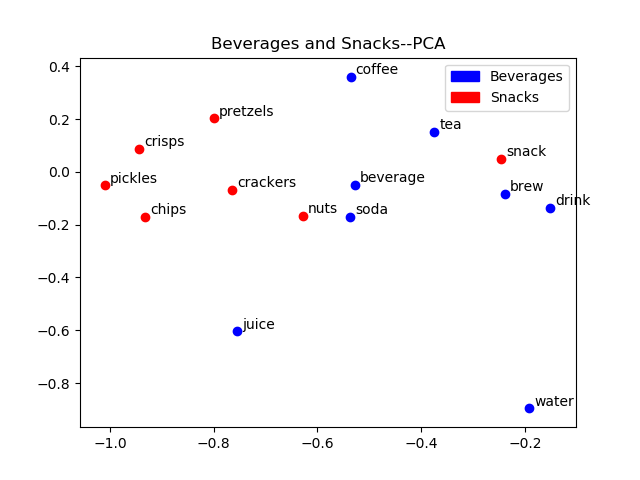

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)



ax.scatter(beverage_vectors[:, 0], beverage_vectors[:, 1], c='blue')
ax.scatter(snack_vectors[:, 0], snack_vectors[:, 1], c='red')

for t in zip(beverage_words, beverage_vectors):
    ax.annotate(t[0], t[1] + np.asarray([0.01, 0.01]))

for t in zip(snack_words, snack_vectors):
    ax.annotate(t[0], t[1] + np.asarray([0.01, 0.01]))

beverage_patch = mpatches.Patch(color='blue', label='Beverages')
snack_patch = mpatches.Patch(color='red', label='Snacks')

ax.legend(handles=[beverage_patch, snack_patch])

ax.set_title('Beverages and Snacks--PCA')



In [20]:
chip_brands = ['popchips', 'kettle', 'lay\'s', 'pringles', 'bugles', 'fritos']
candy_brands = ['skittles', 'starburst', 'snickers', 'twix', 'butterfinger', 'hershey']

chip_indices = [list_of_words.index(w) for w in chip_brands]
candy_indices = [list_of_words.index(w) for w in candy_brands]

chip_vectors = np.asarray([pca_data[i] for i in chip_indices])
candy_vectors = np.asarray([pca_data[i] for i in candy_indices])

<IPython.core.display.Javascript object>


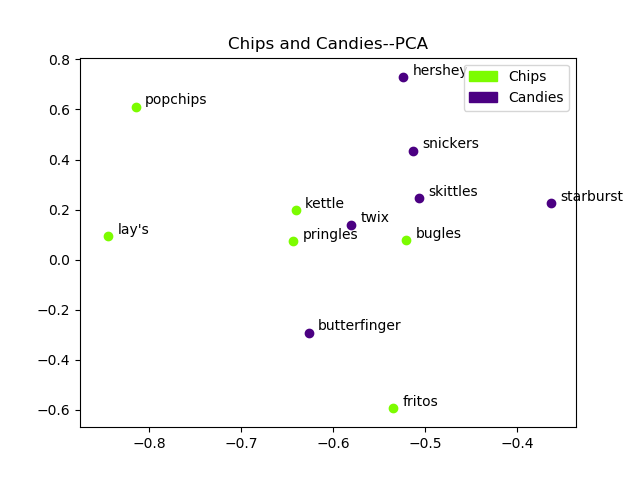

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


ax.scatter(chip_vectors[:, 0], chip_vectors[:, 1], c='lawngreen')
ax.scatter(candy_vectors[:, 0], candy_vectors[:, 1], c='indigo')

for t in zip(chip_brands, chip_vectors):
    ax.annotate(t[0], t[1] + np.asarray([0.01, 0.01]))

for t in zip(candy_brands, candy_vectors):
    ax.annotate(t[0], t[1] + np.asarray([0.01, 0.01]))

chip_patch = mpatches.Patch(color='lawngreen', label='Chips')
candy_patch = mpatches.Patch(color='indigo', label='Candies')

ax.legend(handles=[chip_patch, candy_patch])

ax.set_title('Chips and Candies--PCA')


The groups of related words did not cluster as closely as we might have hoped. This may be due to the fact that PCA gives us a linear transformation of the data. We could be losing important nonlinear structure in the data when we use PCA to reduce the dimension.

Word embeddings are a powerful tool, but perhaps they need to be combined with other techniques to meet their full potential. In doing this project, I found that it would be beneficial to somehow automate the creation of lists of words of interest. For example, it could be interesting to create a visualization of the word vectors associated to the names of all of the different brands of foods mentioned in the reviews. In the future, I am going to use Named Entity Recogniton techniques to try to extract the names of different brands.<br><br>

Additionally, PCA is probably not the best technique to use for dimensionality reduction. However, my attempts to use other methods of dimensionality reduction were stymied the fact that the computation put too much pressure on my computer's memory. However, if I could somehow circumvent this problem, I would probably be able to create more informative visualizations.

Helpful Papers:

word2vec Parameter Learning Explained <br>
Xin Rong<br>
https://arxiv.org/abs/1411.2738


Distributed Representations of Words and Phrases and their Compositionality <br>
Tomas Mikolov, Ilya Sutskever, Kai Chen, Greg Corrado, Jeffrey Dean<br>
https://arxiv.org/abs/1310.4546
    